In [1]:
import os
os.chdir('C:\\Users\\rober\\PycharmProjects\\crusher\\src')
from utils.db.database_manager import dbm
from orm.orm import ExchangeOddsSeriesItem, Market, Event, Team, Runner, ExchangeOddsSeries
from crusher.runner import RunnerCodeEnum as RCEnum
from crusher.item_freq_type import ItemFreqTypeCodeEnum as IFTCEnum
from crusher.division import DivisionCodeEnum
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [42]:
# get data
with dbm.get_managed_session() as session:
    runner = Runner.get_by_code(session, RCEnum.SCORE_0_0)
    df = ExchangeOddsSeriesItem.get_series_items_df(session,
                                                    division_code=[DivisionCodeEnum.PREMIER_LEAGUE,
                                                                   DivisionCodeEnum.CHAMPIONSHIP],
                                                    runner_uid=runner.runner_uid,
                                                    in_play=True,
                                                    item_freq_type_code=IFTCEnum.MINUTE
                                                    )

    # drop series with extreme values
    series_uids = df[df['ltp'] > df['ltp'].mean() + (3 * df['ltp'].std())].series_uid.unique()
    df = df[~df['series_uid'].isin(series_uids)]
    
    # drop series with less than 10 data points
    value_counts = df['series_uid'].value_counts()
    series_uids = value_counts[value_counts < 20].index
    df = df[~df['series_uid'].isin(series_uids)]
    
    df = df.sort_values(['series_uid', 'published_datetime'], ascending=[True, True])
    df = df[['series_uid', 'ltp', 'published_datetime']]

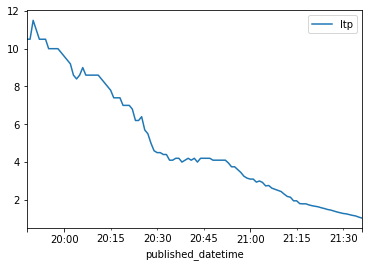

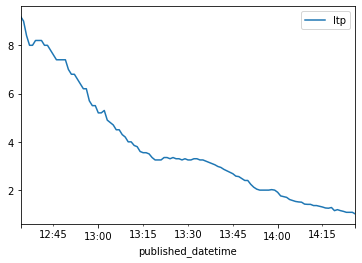

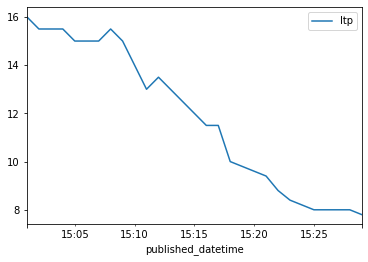

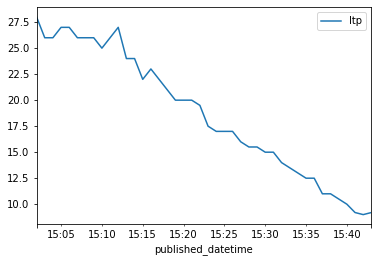

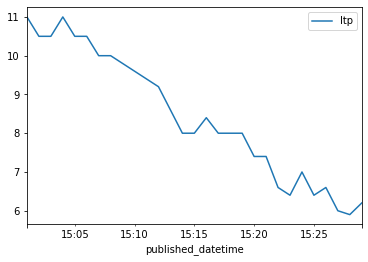

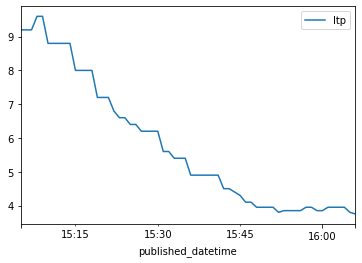

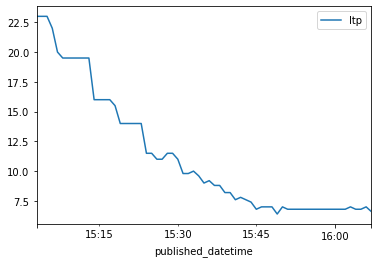

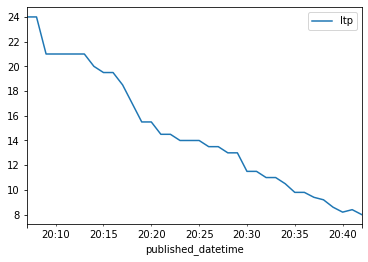

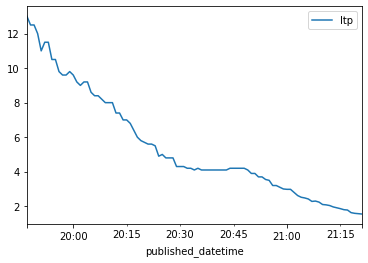

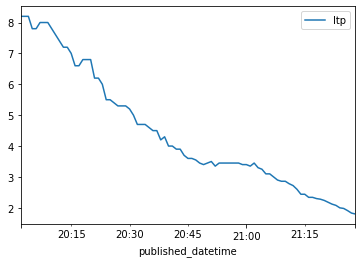

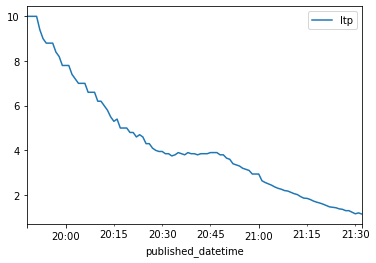

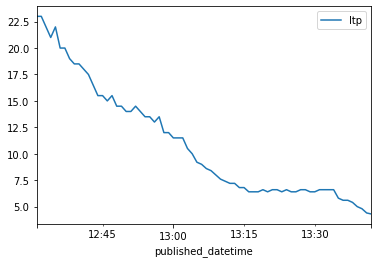

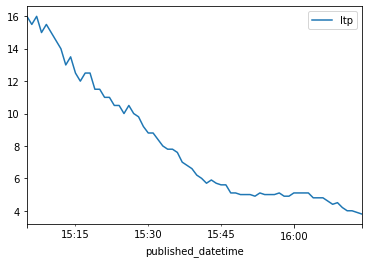

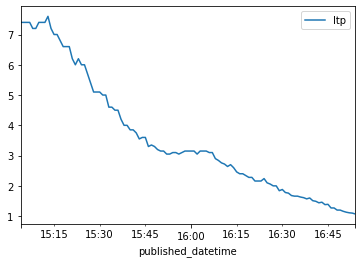

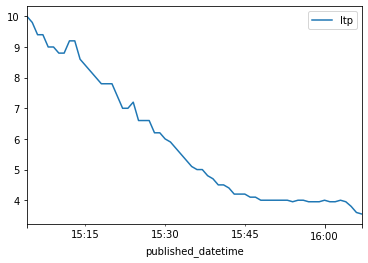

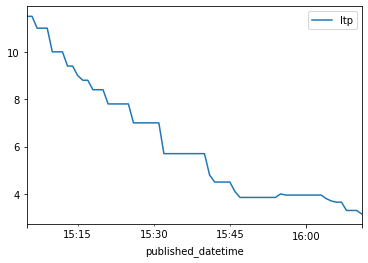

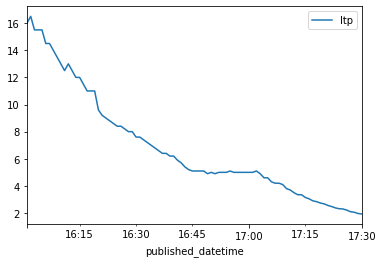

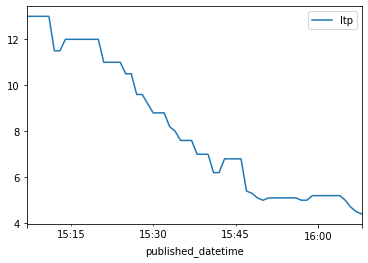

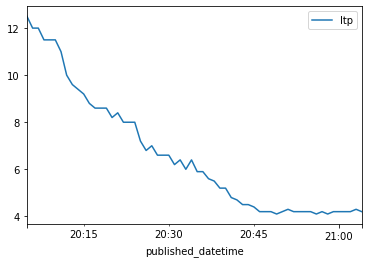

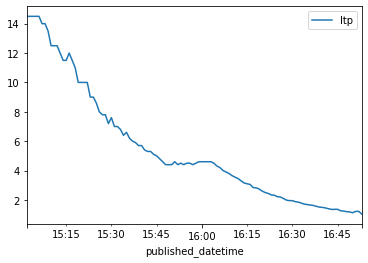

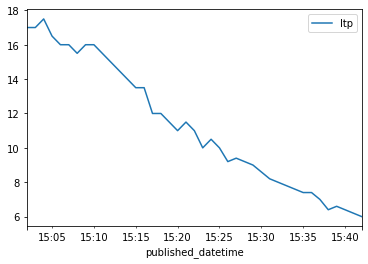

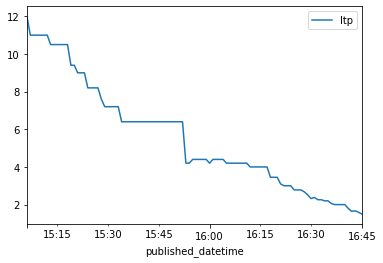

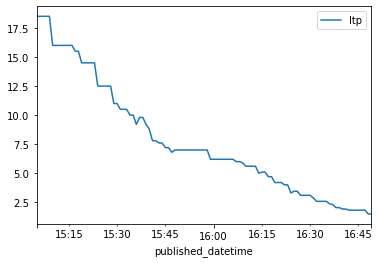

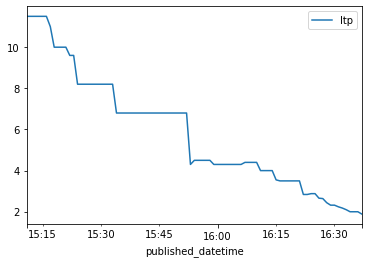

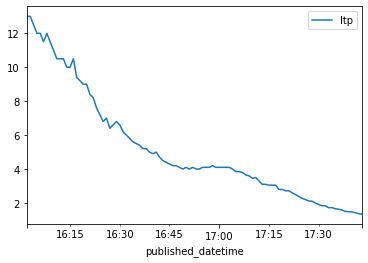

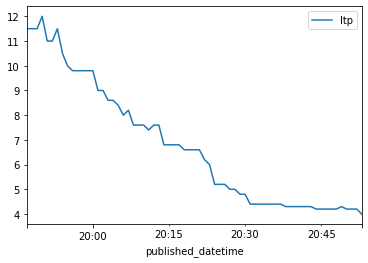

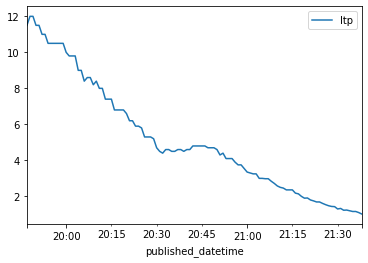

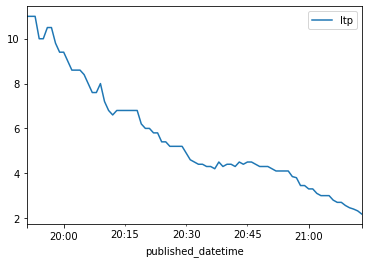

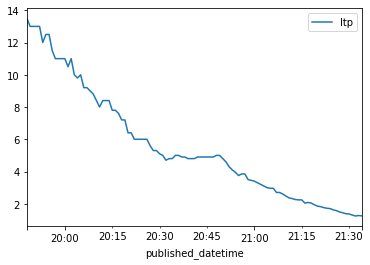

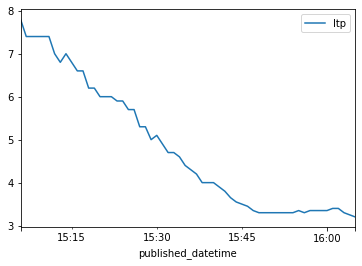

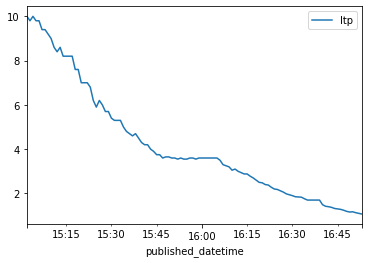

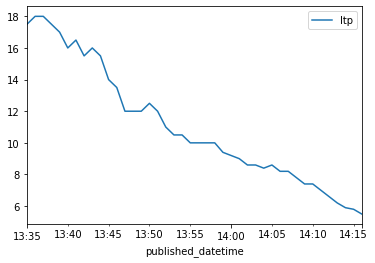

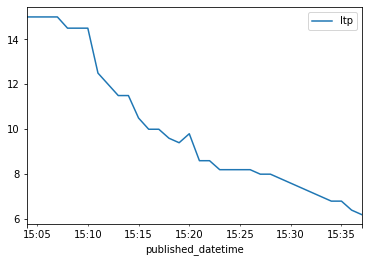

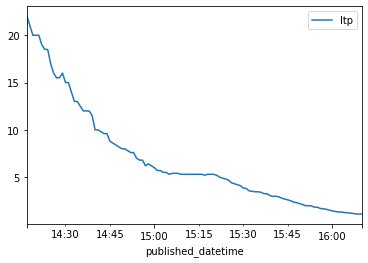

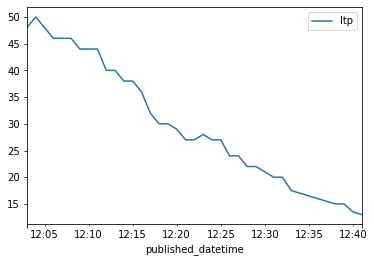

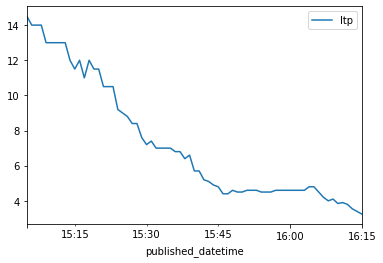

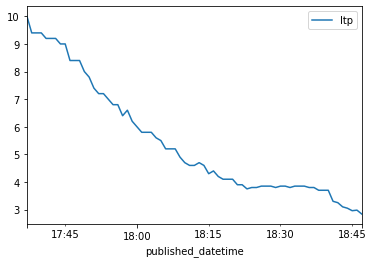

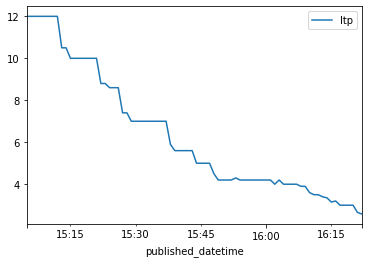

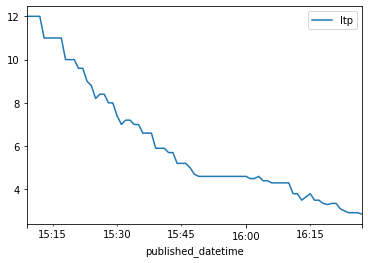

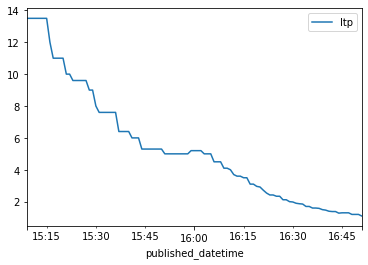

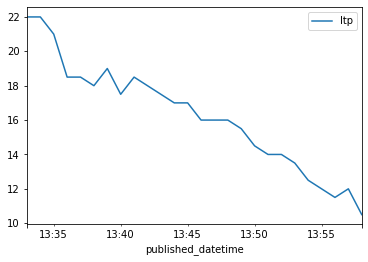

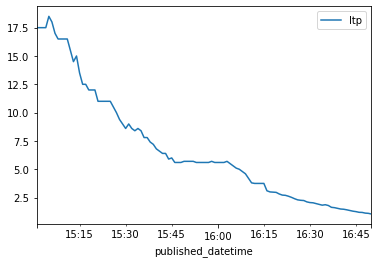

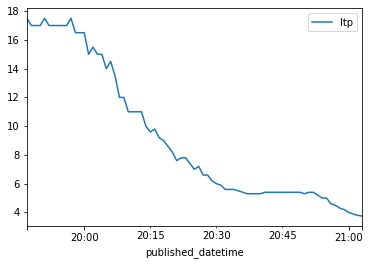

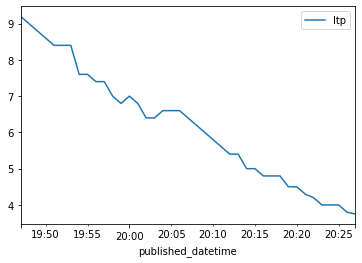

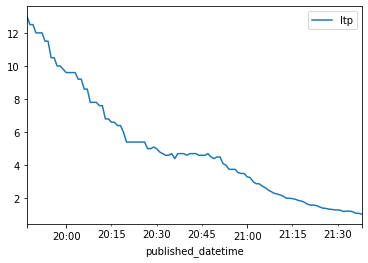

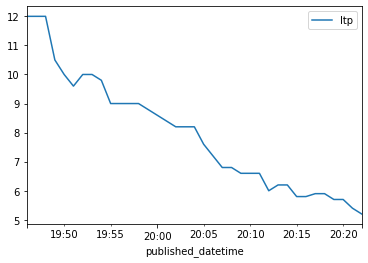

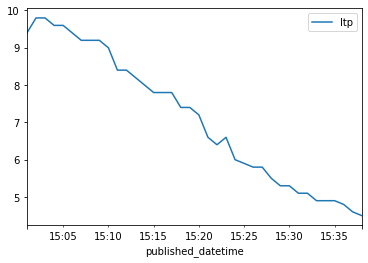

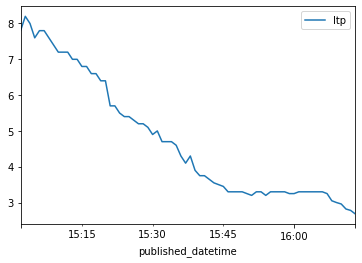

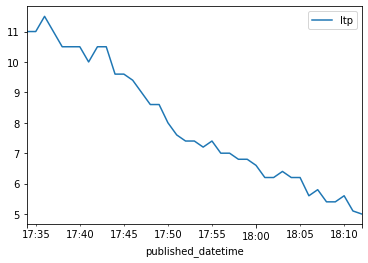

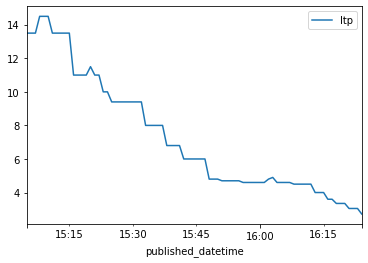

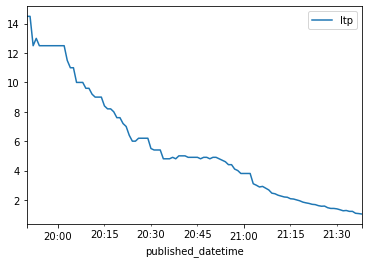

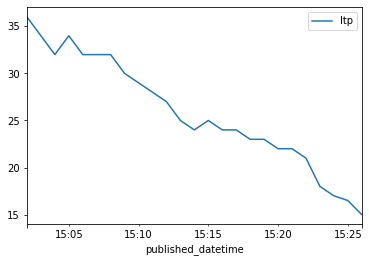

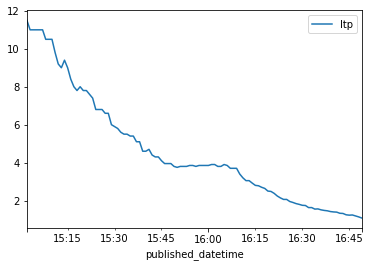

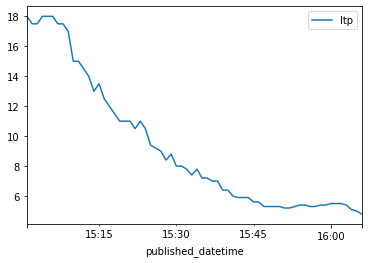

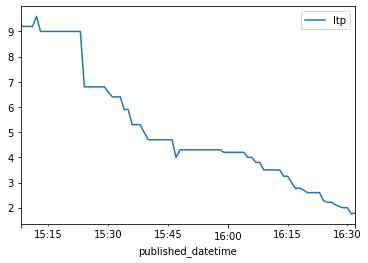

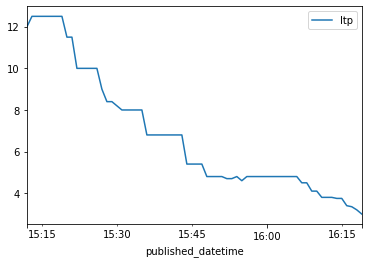

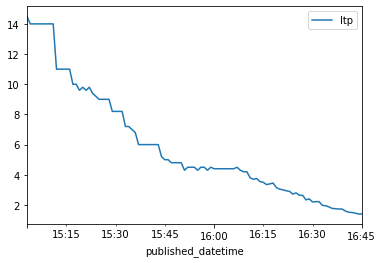

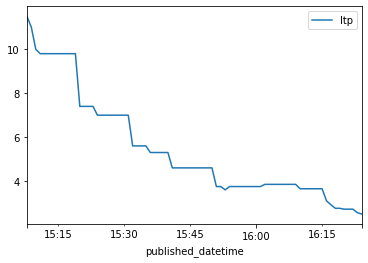

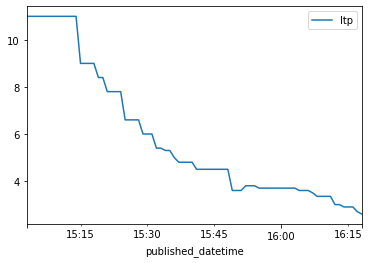

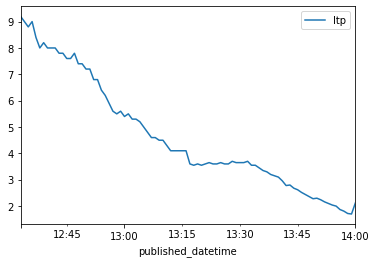

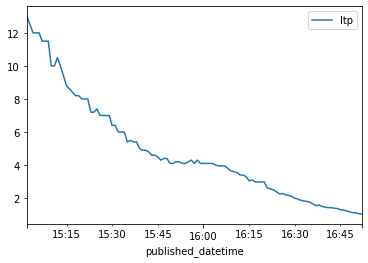

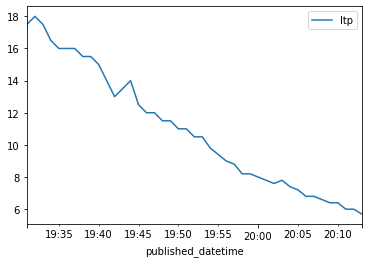

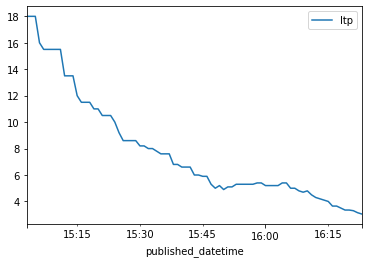

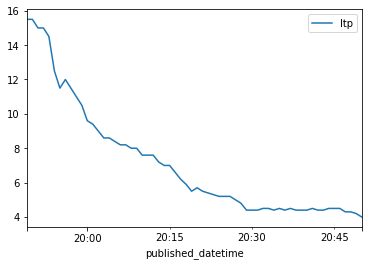

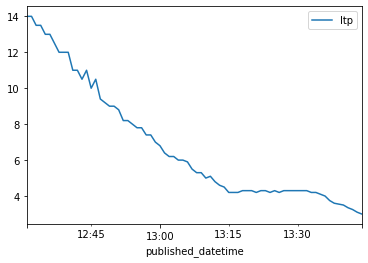

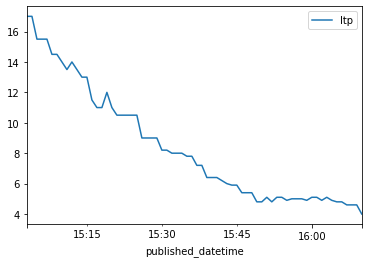

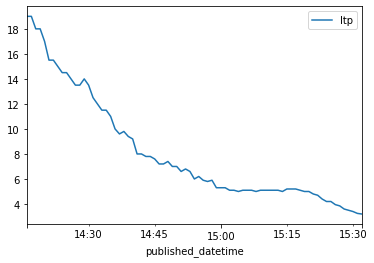

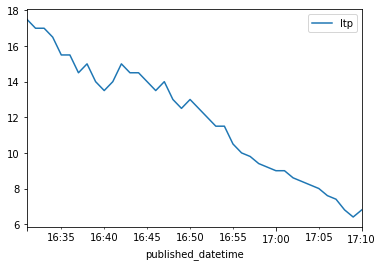

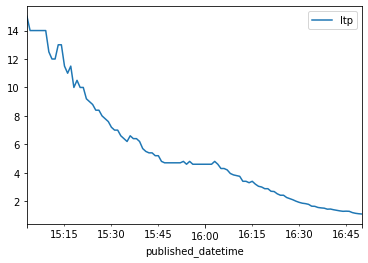

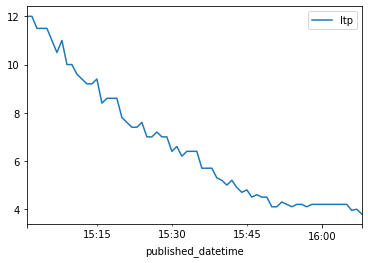

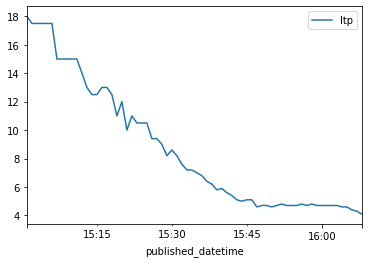

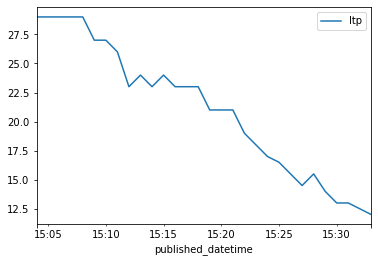

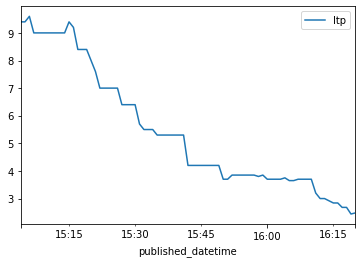

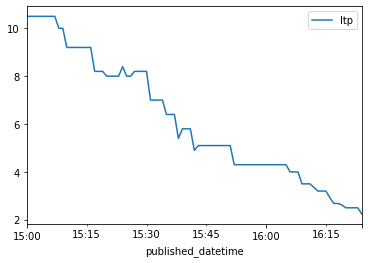

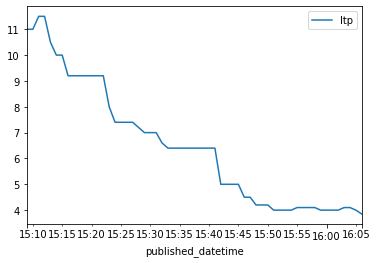

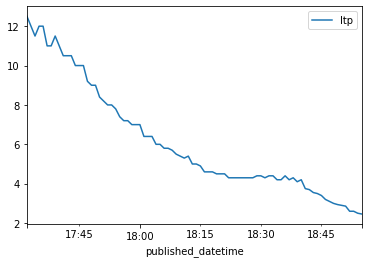

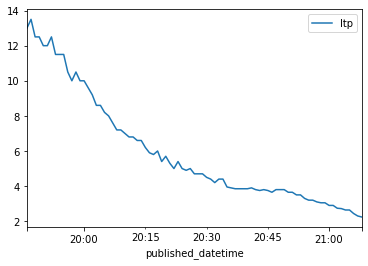

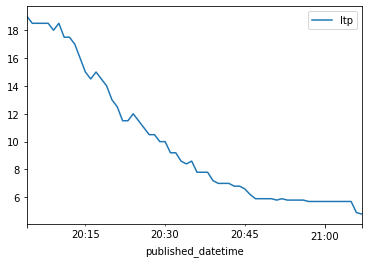

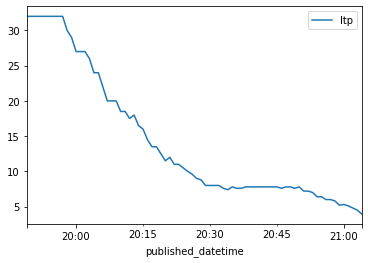

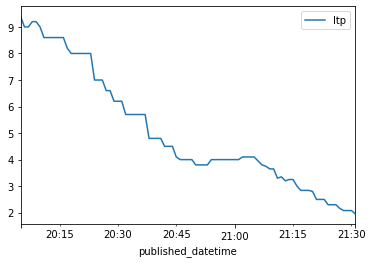

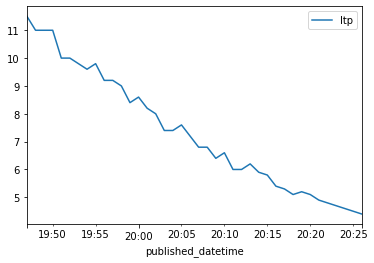

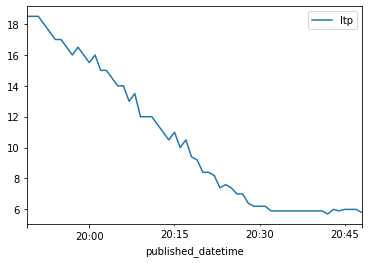

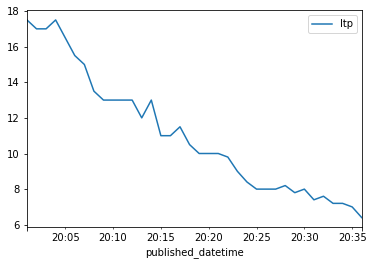

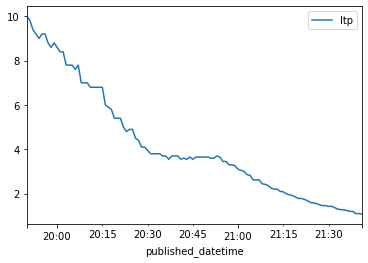

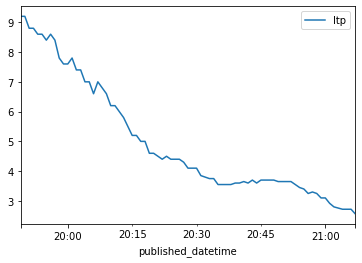

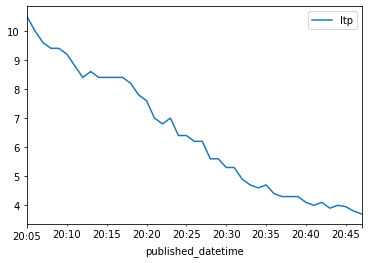

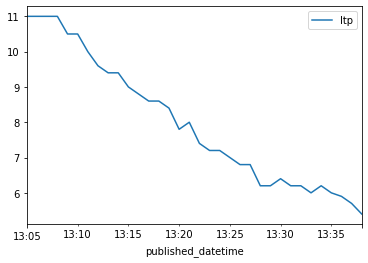

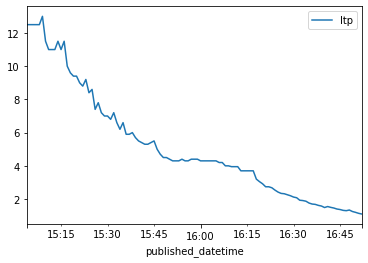

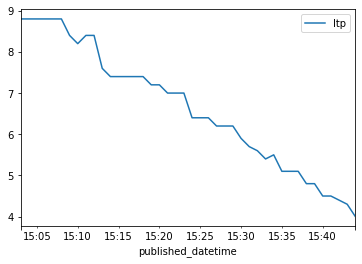

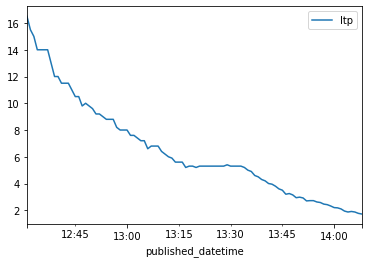

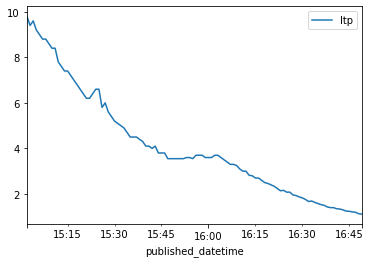

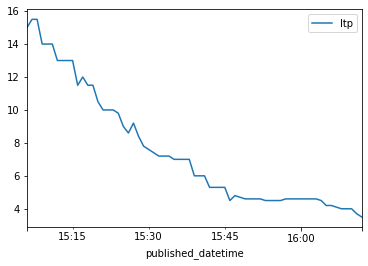

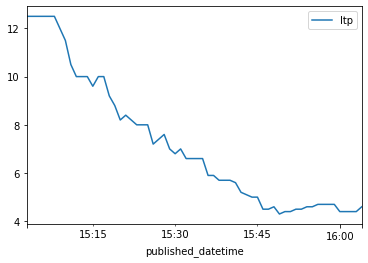

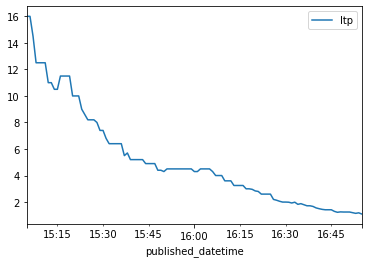

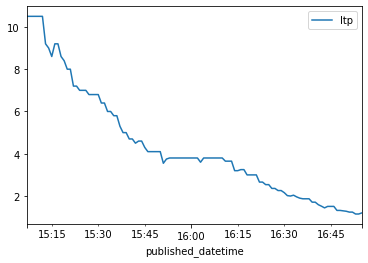

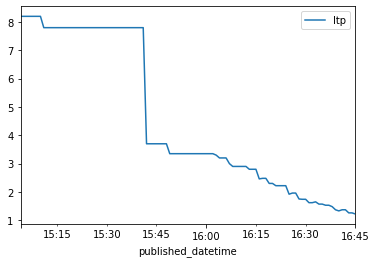

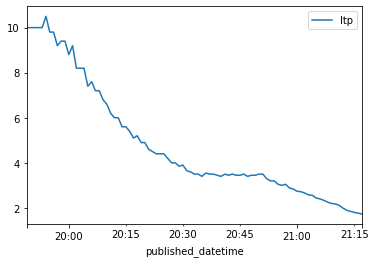

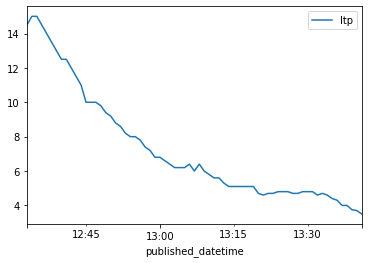

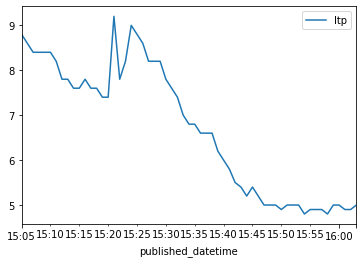

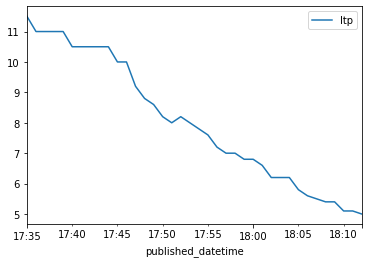

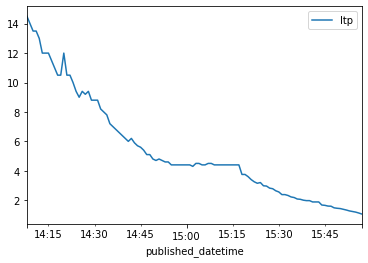

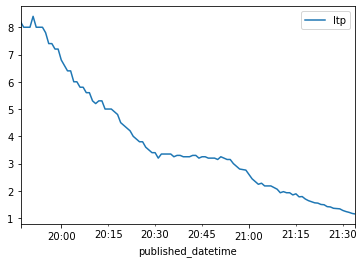

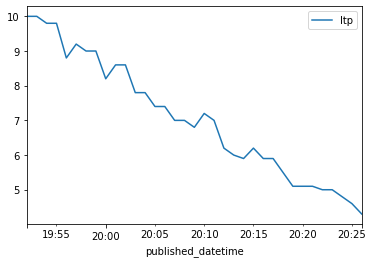

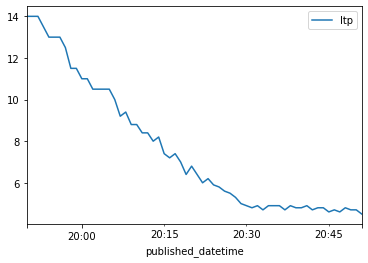

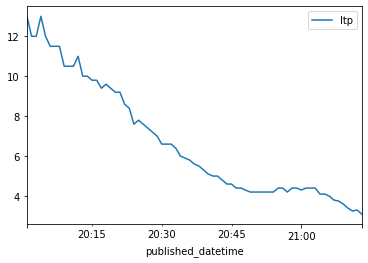

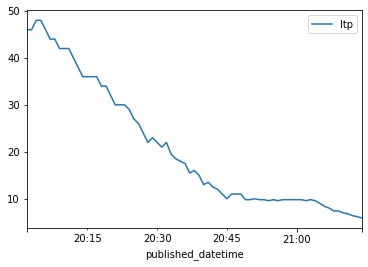

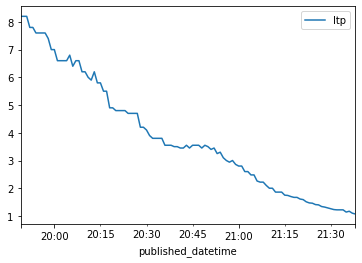

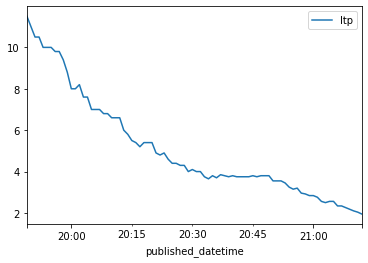

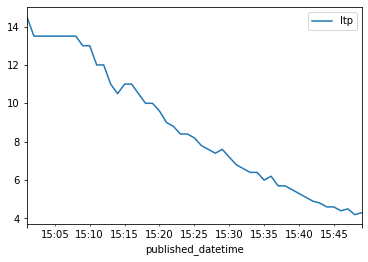

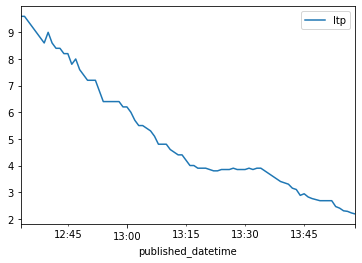

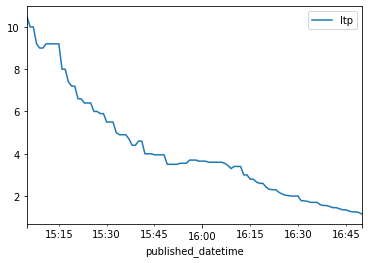

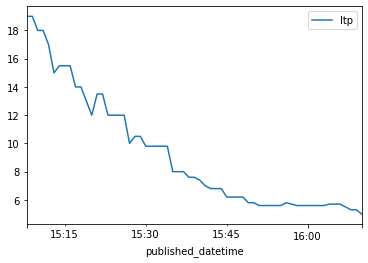

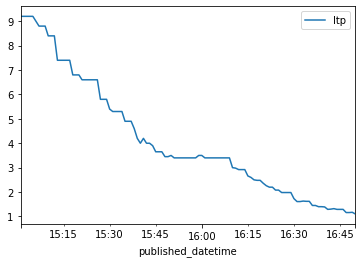

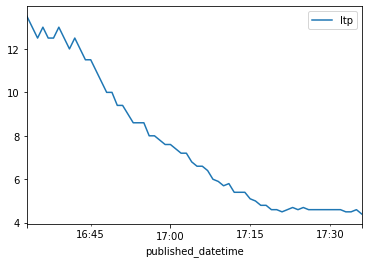

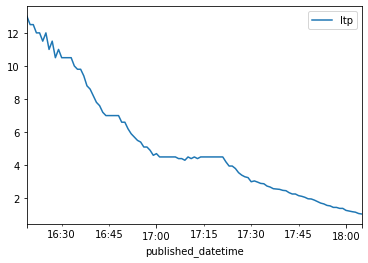

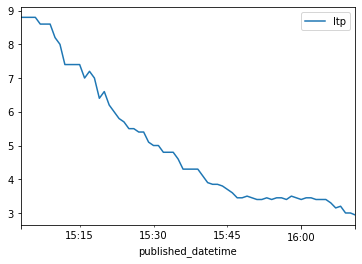

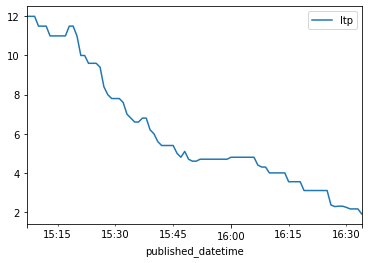

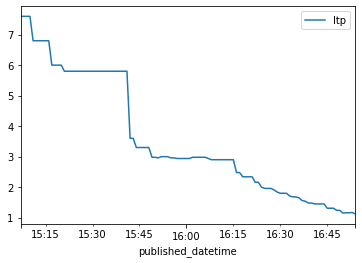

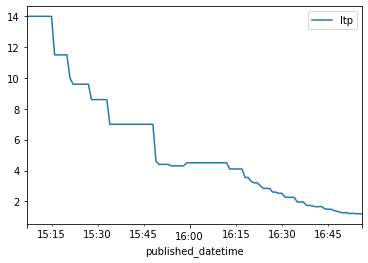

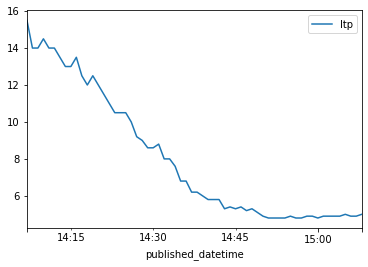

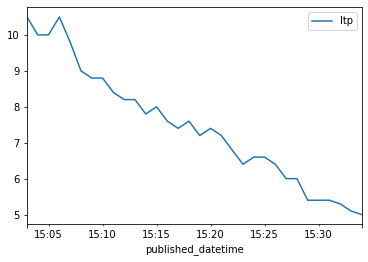

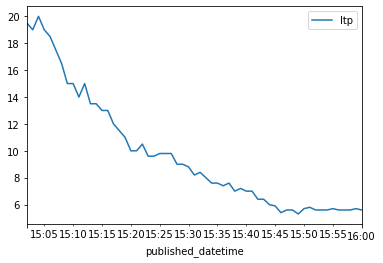

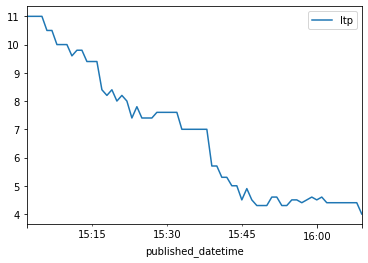

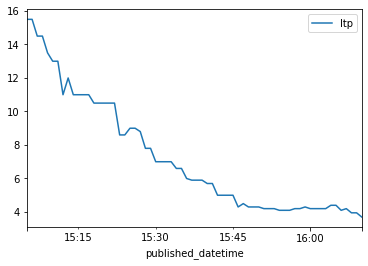

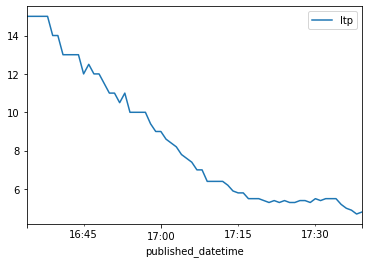

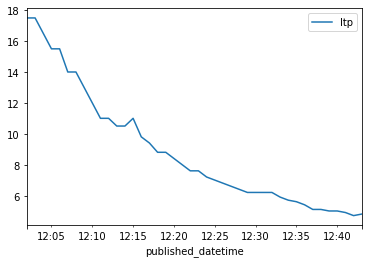

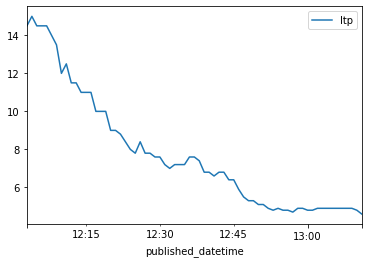

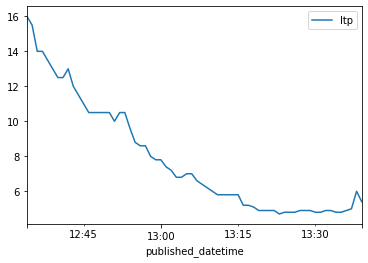

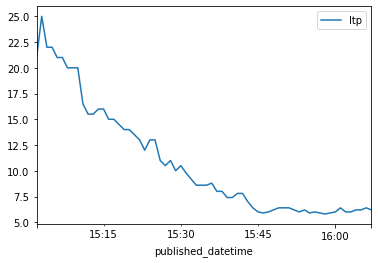

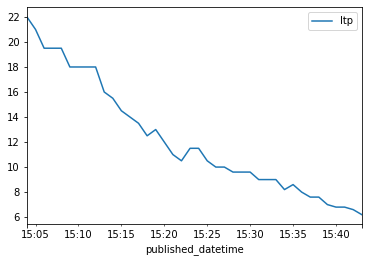

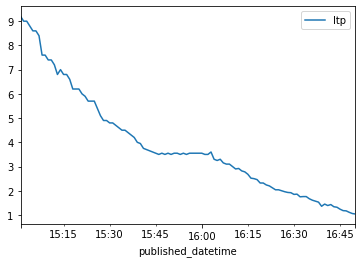

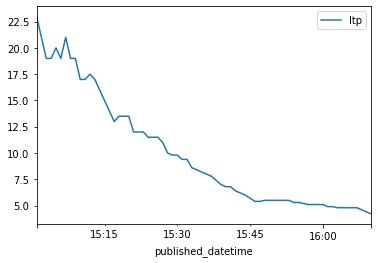

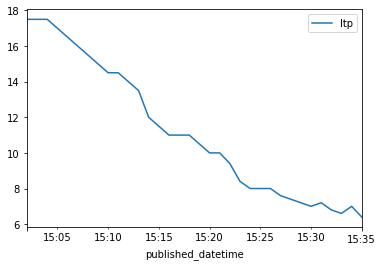

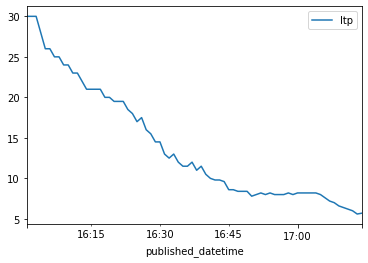

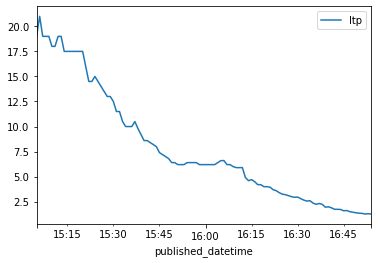

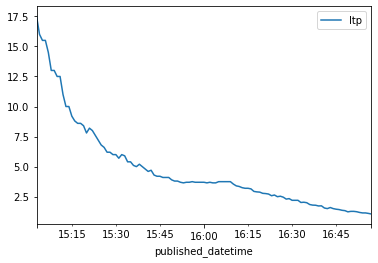

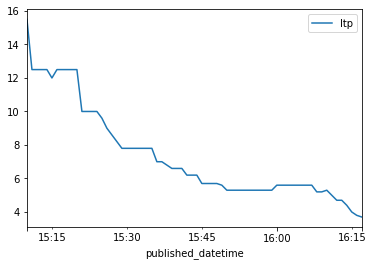

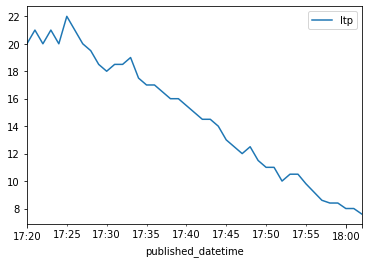

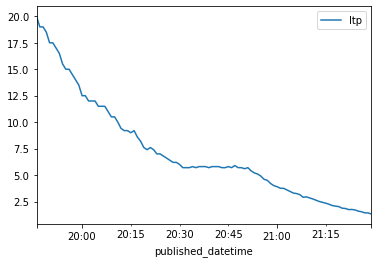

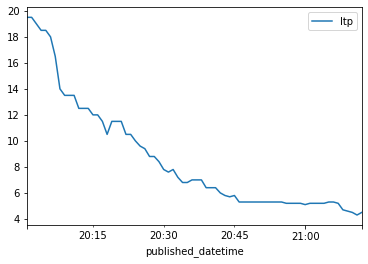

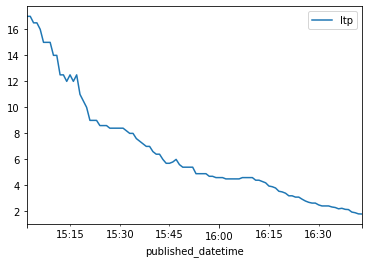

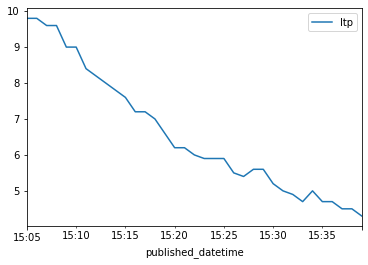

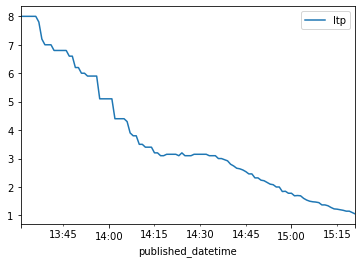

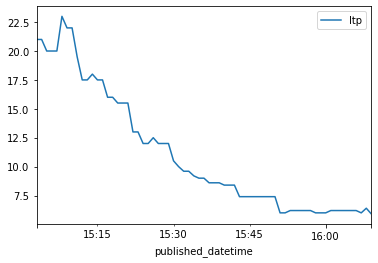

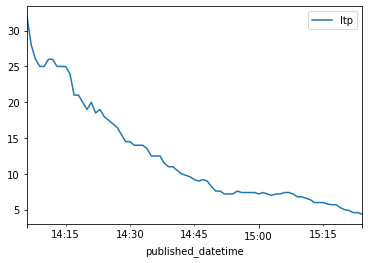

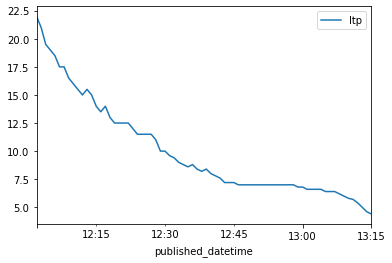

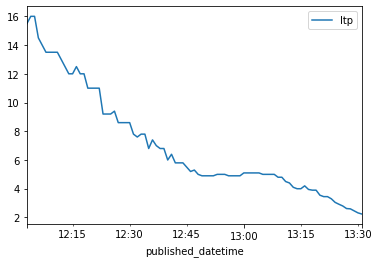

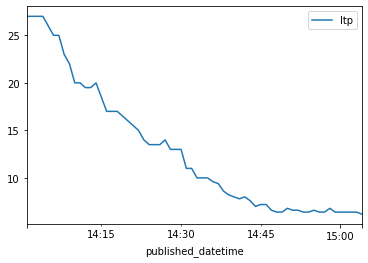

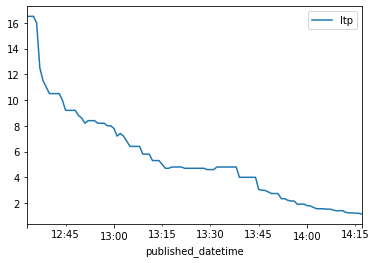

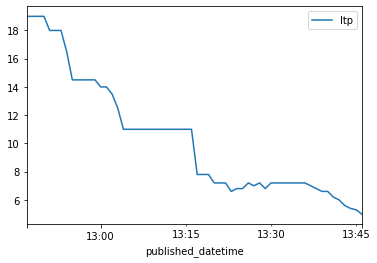

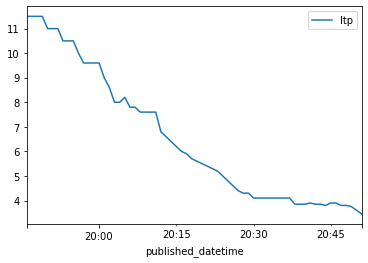

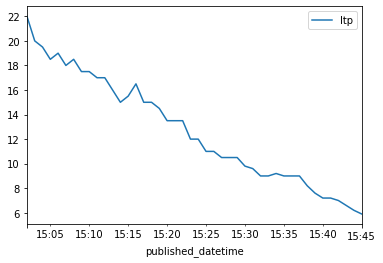

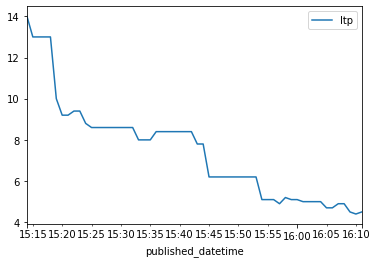

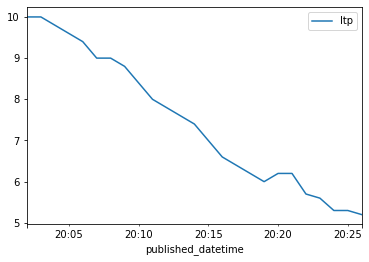

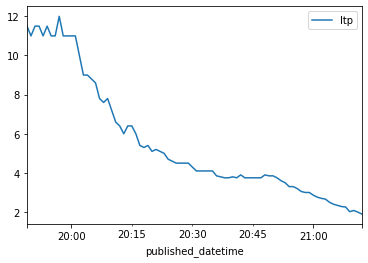

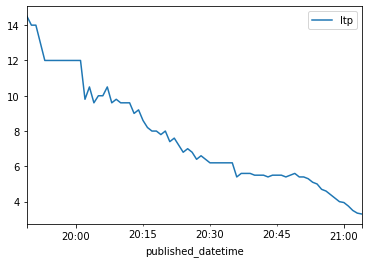

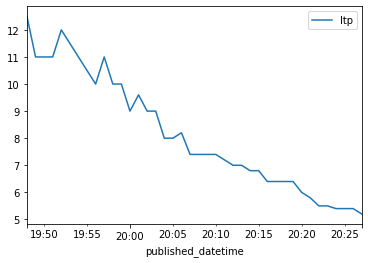

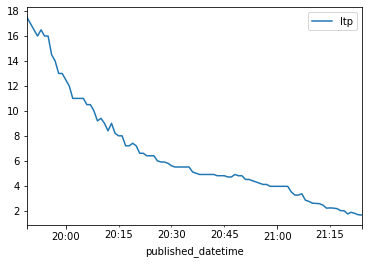

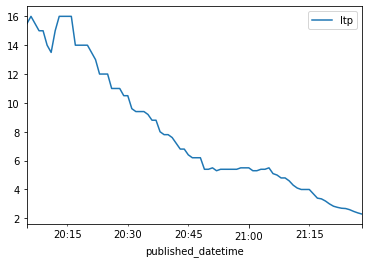

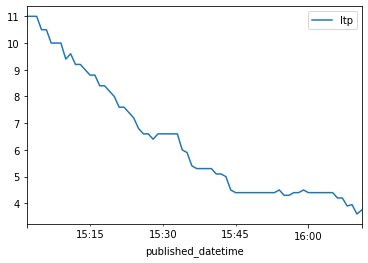

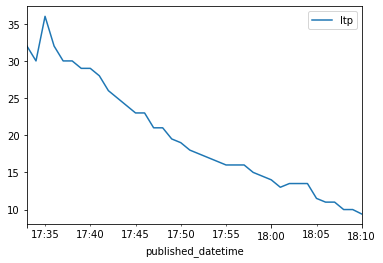

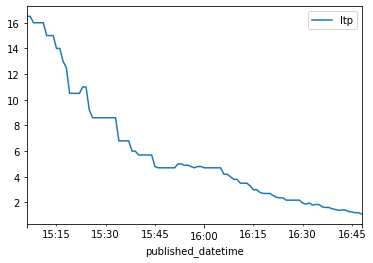

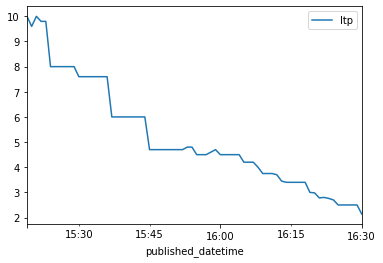

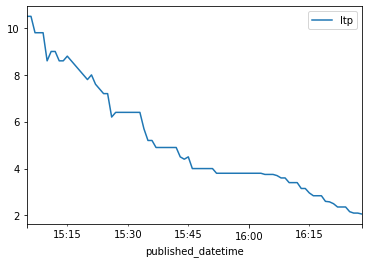

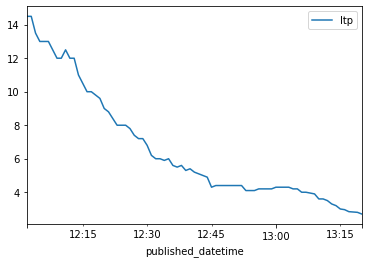

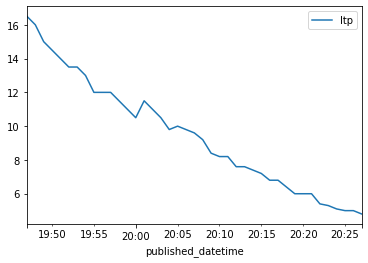

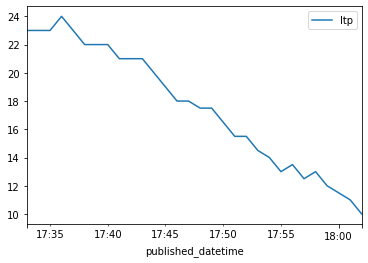

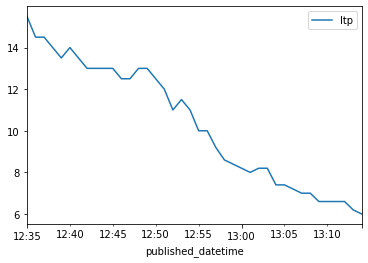

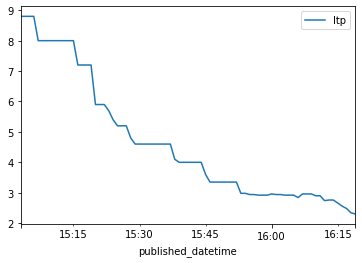

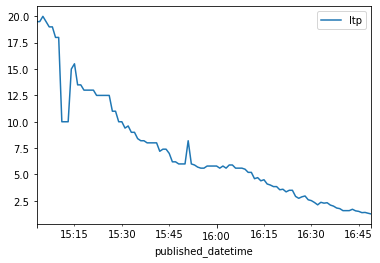

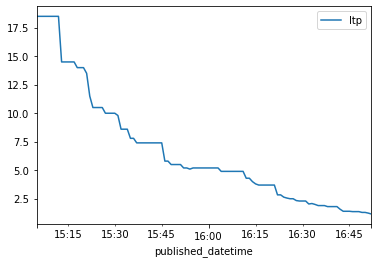

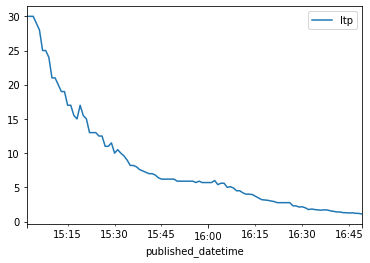

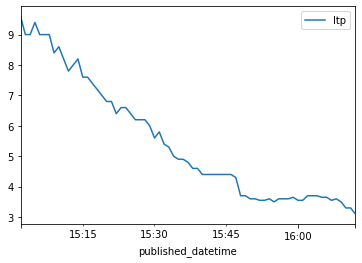

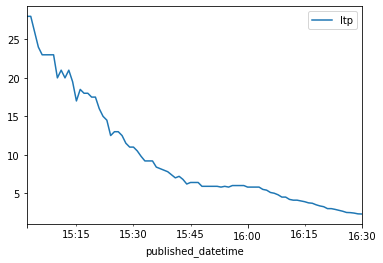

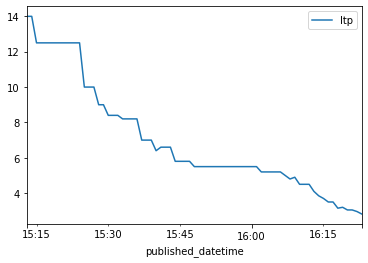

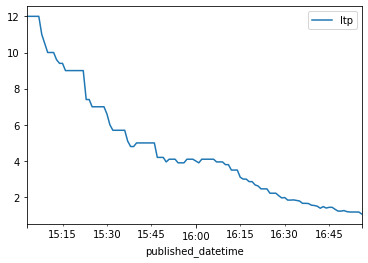

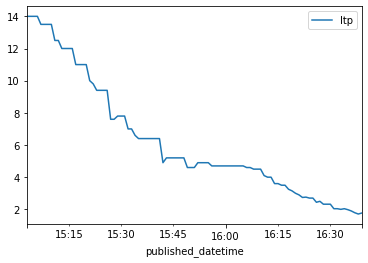

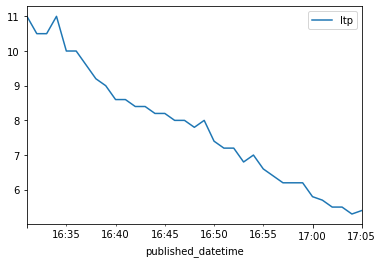

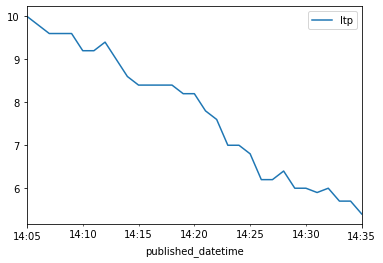

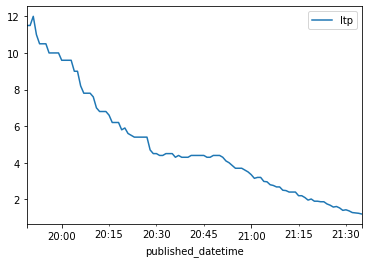

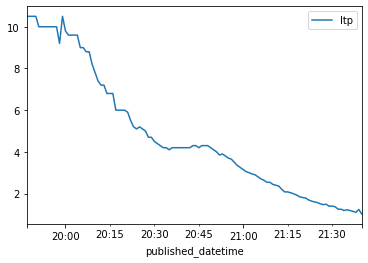

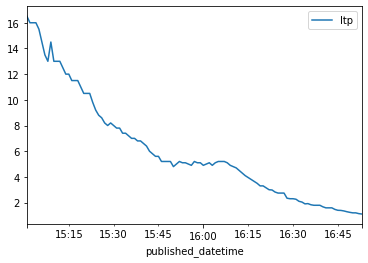

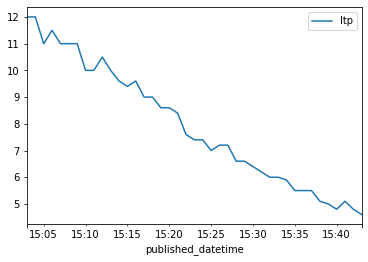

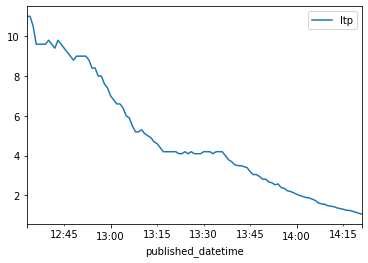

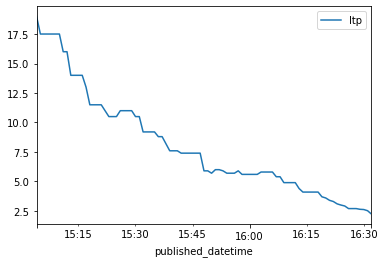

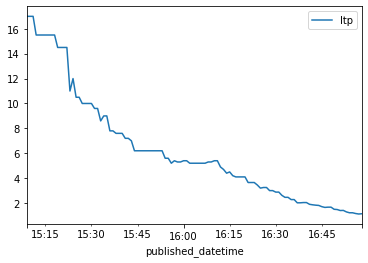

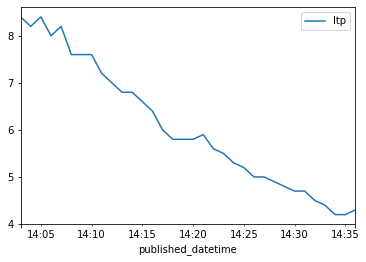

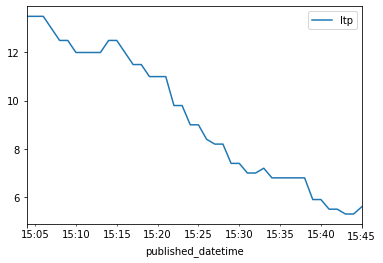

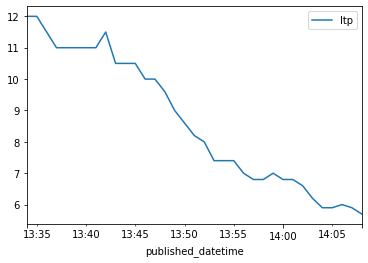

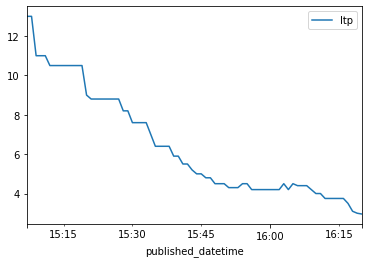

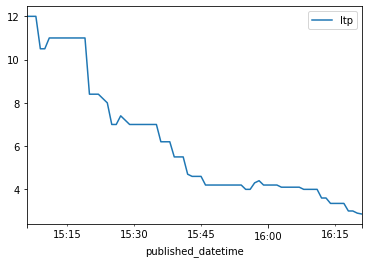

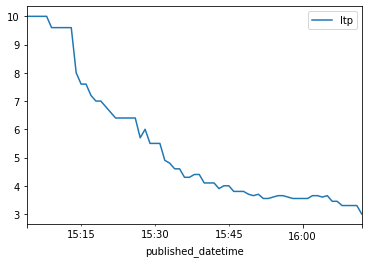

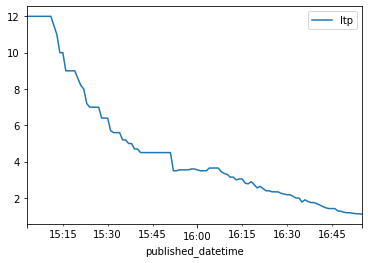

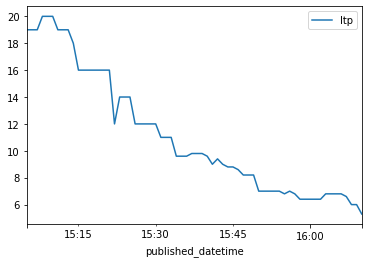

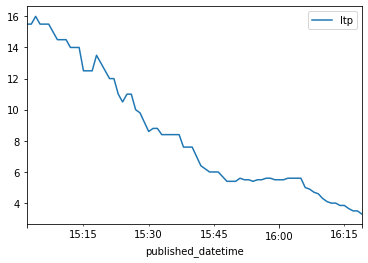

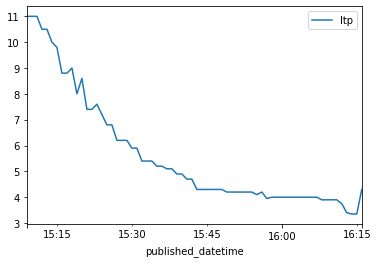

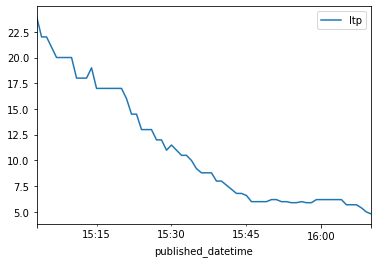

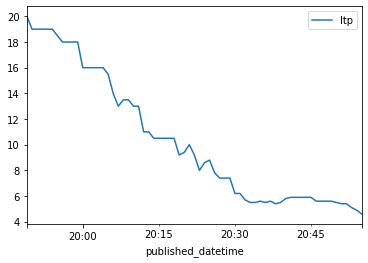

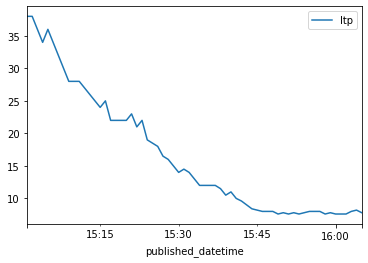

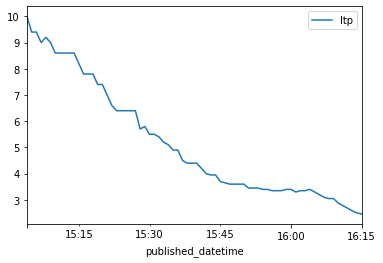

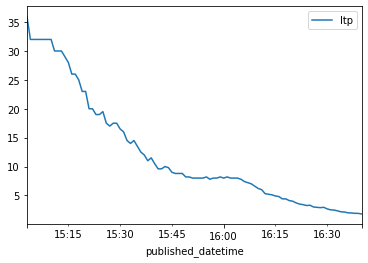

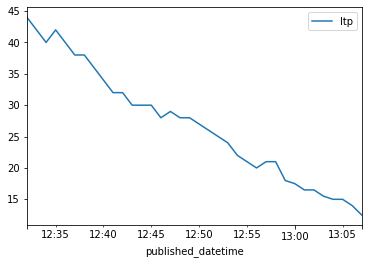

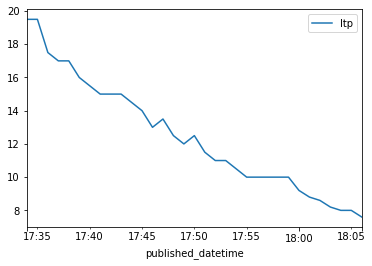

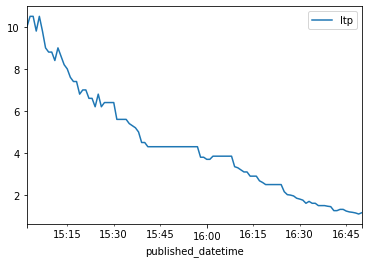

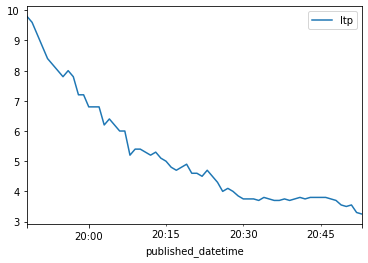

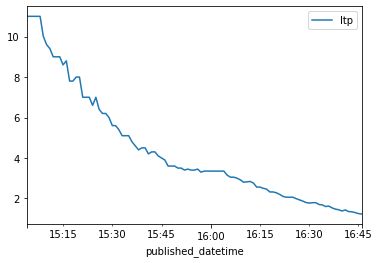

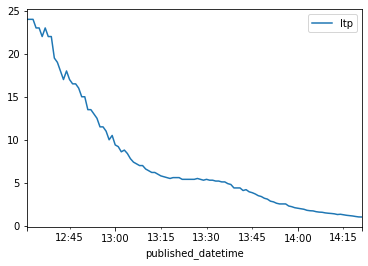

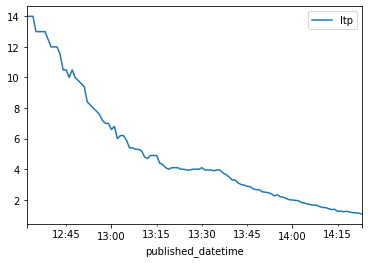

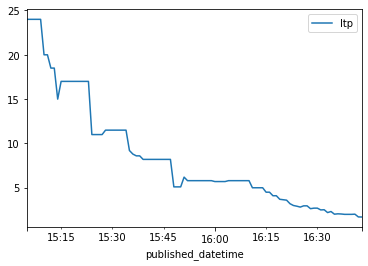

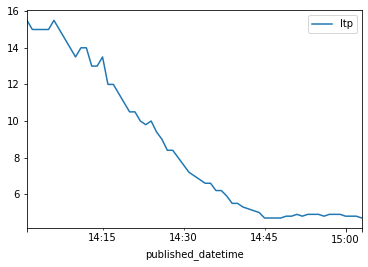

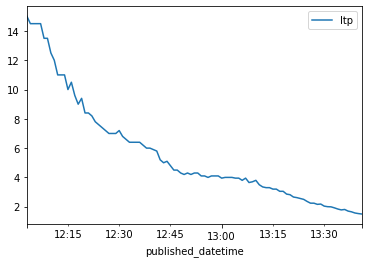

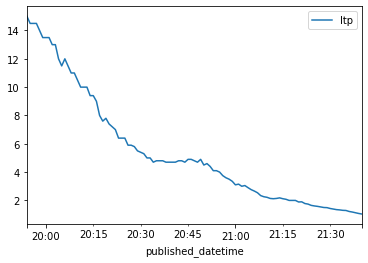

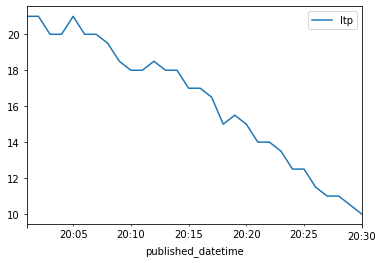

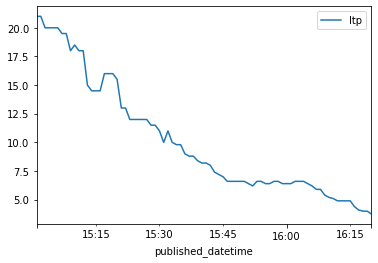

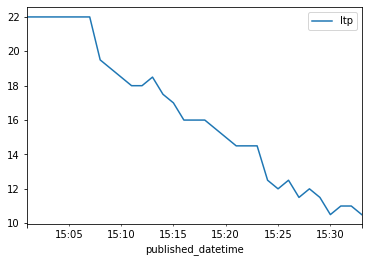

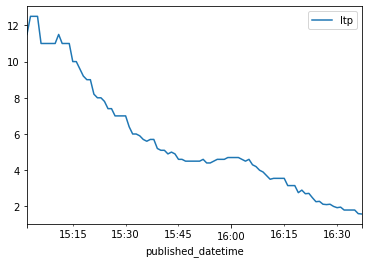

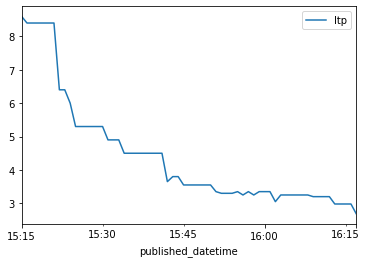

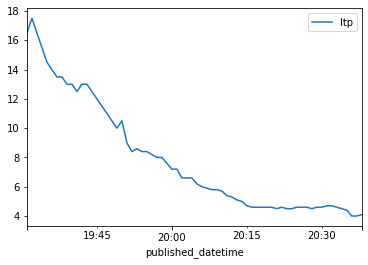

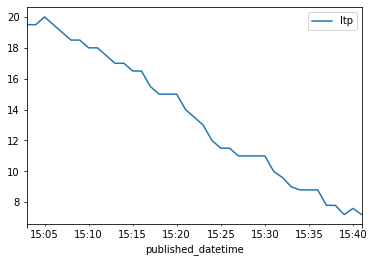

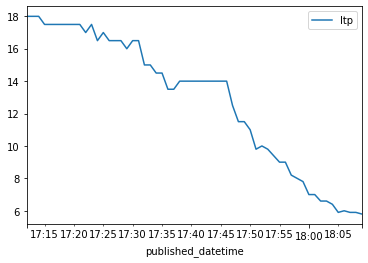

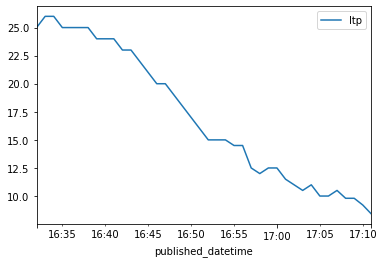

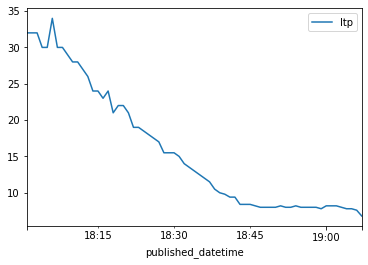

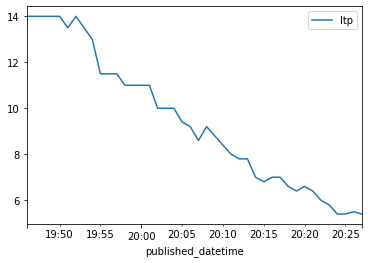

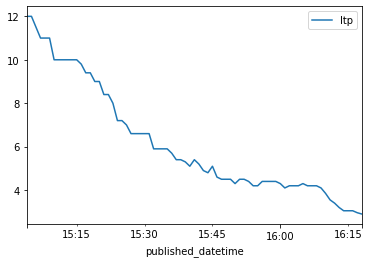

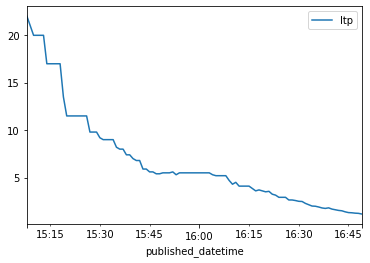

In [52]:
for series_uid in df['series_uid'].unique():
    sub_df = df[df['series_uid'] == series_uid].copy(deep=True)
    sub_df = sub_df.set_index(pd.DatetimeIndex(sub_df['published_datetime']))
    sub_df = sub_df.drop(['published_datetime', 'series_uid'], axis=1)
    
    if (sub_df.tail(2).diff().iloc[1] > 1)['ltp']:
        continue
    
    sub_df = sub_df.resample('T').asfreq().fillna(method='ffill')
    sub_df.plot()
    plt.show()
    
#     # resample to minute
#     sub_df = sub_df.resample('T').asfreq()
#     sub_df.plot()
#     plt.show()